### Import Libraries

In [376]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Import Dataset

In [377]:
df = pd.read_csv("Salary_Data.csv")

In [378]:
print(df.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


### Check for null values

In [379]:
print(df.isnull().values.any())
print(df.isnull().sum())

True
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


### Imputing

In [380]:
num_cols = ["Age","Years of Experience","Salary"]
cat_cols = ["Gender", "Education Level", "Job Title"]

imputer = SimpleImputer(strategy="mean")
df[num_cols] = imputer.fit_transform(df[num_cols])
imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = imputer.fit_transform(df[cat_cols])

In [381]:
print(df.isnull().values.any())
print(df.isnull().sum())

False
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


### Split Features from the Independent Variable

In [382]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

### Encoding Categorical Data

In [383]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [384]:
print(X)

       Age  Years of Experience  Gender_Male  Gender_Other  \
0     32.0                  5.0         True         False   
1     28.0                  3.0        False         False   
2     45.0                 15.0         True         False   
3     36.0                  7.0        False         False   
4     52.0                 20.0         True         False   
...    ...                  ...          ...           ...   
6699  49.0                 20.0        False         False   
6700  32.0                  3.0         True         False   
6701  30.0                  4.0        False         False   
6702  46.0                 14.0         True         False   
6703  26.0                  1.0        False         False   

      Education Level_Bachelor's Degree  Education Level_High School  \
0                                 False                        False   
1                                 False                        False   
2                                 False

### Splitting the Training Set and Test Set

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [386]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       Age  Years of Experience  Gender_Male  Gender_Other  \
4770  26.0                  2.0         True         False   
3644  29.0                  5.0        False         False   
1900  47.0                 16.0         True         False   
4634  27.0                  1.0        False         False   
2971  49.0                 22.0        False         False   
...    ...                  ...          ...           ...   
1259  54.0                 17.0         True         False   
5538  24.0                  0.0        False         False   
3264  26.0                  2.0         True         False   
399   29.0                  4.0         True         False   
2532  38.0                 13.0        False         False   

      Education Level_Bachelor's Degree  Education Level_High School  \
4770                              False                         True   
3644                              False                        False   
1900                              False

### Feature Scaling

In [387]:
scaler = StandardScaler()
columns_to_scale = ["Age", "Years of Experience"]
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [388]:
print(X_train)
print(X_test)

           Age  Years of Experience  Gender_Male  Gender_Other  \
4770 -1.003026            -1.009453         True         False   
3644 -0.608091            -0.512247        False         False   
1900  1.761518             1.310843         True         False   
4634 -0.871381            -1.175189        False         False   
2971  2.024808             2.305256        False         False   
...        ...                  ...          ...           ...   
1259  2.683033             1.476579         True         False   
5538 -1.266315            -1.340924        False         False   
3264 -1.003026            -1.009453         True         False   
399  -0.608091            -0.677982         True         False   
2532  0.576714             0.813637        False         False   

      Education Level_Bachelor's Degree  Education Level_High School  \
4770                              False                         True   
3644                              False                        

### Create the Model and Fit to Training Data

In [389]:
lasso = Lasso(alpha=0)
lasso.fit(X_train,y_train)

/home/monarch/salaryproject/salarymodel/.venv/lib/python3.10/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/monarch/salaryproject/salarymodel/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


/home/monarch/salaryproject/salarymodel/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.362e+11, tolerance: 1.495e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0)

### Predict on the Test Data

In [390]:
y_pred = lasso.predict(X_test)

In [391]:
print(y_pred)

[ 82477.96016567 134600.21168367  37843.29711635 ... 137008.6822526
 160886.0735855  138108.49857856]


In [392]:
print(y_test)

3506     80000.0
4776    125000.0
4539     42000.0
4262    168000.0
2884    110707.0
          ...   
2506    138032.0
2656    120000.0
952     197000.0
811     190000.0
657     185000.0
Name: Salary, Length: 1341, dtype: float64


### Change this to a better format

In [393]:
y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)

In [394]:
print(y_test_series)
print(y_pred_series)

3506     80000.0
4776    125000.0
4539     42000.0
4262    168000.0
2884    110707.0
          ...   
2506    138032.0
2656    120000.0
952     197000.0
811     190000.0
657     185000.0
Name: Salary, Length: 1341, dtype: float64
0        82477.960166
1       134600.211684
2        37843.297116
3       194862.325781
4       113251.797596
            ...      
1336    158779.022322
1337    109892.897789
1338    137008.682253
1339    160886.073586
1340    138108.498579
Length: 1341, dtype: float64


### Create a DataFrame for Comparison

In [395]:
comparison_df = pd.concat([y_test_series.reset_index(drop=True), y_pred_series], axis=1)
comparison_df.columns = ["Actual", "Predicted"]

print(comparison_df)

        Actual      Predicted
0      80000.0   82477.960166
1     125000.0  134600.211684
2      42000.0   37843.297116
3     168000.0  194862.325781
4     110707.0  113251.797596
...        ...            ...
1336  138032.0  158779.022322
1337  120000.0  109892.897789
1338  197000.0  137008.682253
1339  190000.0  160886.073586
1340  185000.0  138108.498579

[1341 rows x 2 columns]


### Evaluate the Model

In [396]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_series.values, y_pred_series.values)
rmse = np.sqrt(mean_squared_error(y_test_series.values, y_pred_series.values))
mae = mean_absolute_error(y_test_series.values, y_pred_series.values)
r2 = r2_score(y_test_series.values, y_pred_series.values)


In [397]:
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R-Squared Score: ", r2)

Mean Squared Error:  372317920.1240286
Root Mean Squared Error:  19295.54145713534
Mean Absolute Error:  13349.838435956584
R-Squared Score:  0.8653480297222379


### Visualize Actual vs. Predicted

Text(0.5, 1.0, 'Actual vs. Predicted Values')

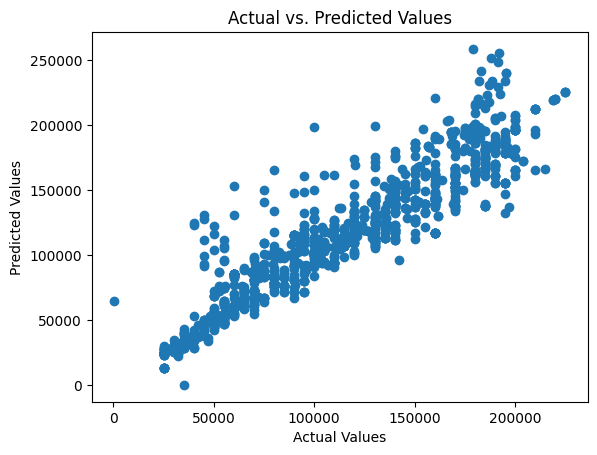

In [398]:
plt.scatter(y_test_series.values, y_pred_series.values)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

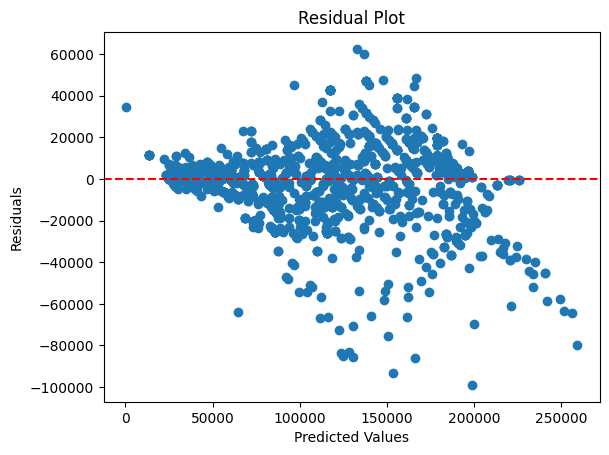

In [399]:

residuals = y_test_series.values - y_pred_series.values
plt.scatter(y_pred_series.values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Save the Lasso Regression Model

In [400]:
import joblib

joblib.dump(lasso, "lasso_model.joblib")

['lasso_model.joblib']